(c) 2023 Manuel Razo. This work is licensed under a [Creative Commons
Attribution License CC-BY 4.0](https://creativecommons.org/licenses/by/4.0/).
All code contained herein is licensed under an [MIT
license](https://opensource.org/licenses/MIT).

# El represilador genético

En este ejercicio, estudiaremos uno de los circuítos genéticos que abriron la
puerta a la revolución de la biología sintética. Hoy en día tomamos por hecho
que la célula está formada por una compleja red de interacciones genéticas que
le ayudan a sensar y responder tanto a su ambiente externo como a su estado
intracelular. La selección natural ha esculpido estas interacciones genéticas
tal que la célula (y el organismo en general) puede computar acciones complejas
tal como contar el paso del tiempo. 

Los relojes moleculares están involucrados en diversos procesos biológicos tal
como el desarrollo embrionario y los ciclos metabólicos en la fotosíntesis. En
estos circuitos genéticos, las interaccione físicas entre sus componentes le
permiten a la célula mantener oscilaciones en las concentracione de ciertos
componentes con una periodicidad regular, permitiéndole "leer" el tiempo en
funcion de estas concentraciones.

A principio de los 2000, nuestro entendimiento de la biología molecular había
llegado a un punto en que podíamos imaginar diseñar circuitos genéticos que no
existen en la naturaleza. De ahí nace el campo de la biología sintética que
intenta transformar a los organismos vivos en una plataforma ingenieril para
diseñar maquinarias biológicas que realicen funciones de utilidad. La diferencia
entre la biología molecular, que ha logrado tantos avances como la producción de
insulina humana en una bacteria, y la biología sintética es que en la biología
sintética el objetivo es diseñar organismos que tengan comportamientos complejos
en el tiempo y/o que sean robustos a cambios en el ambiente.

Uno de los primeros ejemplos de las promesas de la biología molecular vino en un
[artículo clásico de Elowitz y
Leibler](https://www.nature.com/articles/35002125) en el que diseñaron un
circuito genético capas de sostener oscilaciones periódicas con el uso de tres
represores. A este diseño se le bautizó como el "represilador" por tener
represores oscilando en concentración. El diseño del circuito genético consiste
en tres genes codificando factores de transcripción que se reprimen mutuamente
de manera circular como lo muestra el diagrama original del artículo.

<center>
<img src="./figs/represilator.png" alt="repressilator" style="width: 200px;"/>
</center>

Por simplicidad, llamemos a los represores $R_1$, $R_2$, y $R_3$. Tenemos que
$R_1$ reprime a $R_2$. A su vez $R_2$ reprime a $R_3$, y finalmente $R_3$ cierra
el círculo reprimiendo a $R_1$. La idea del diseñi es que si $R_1$ inicia con
una concentración más alta que $R_2$, entonces la concentración de $R_2$
disminuirá al ser reprimido. Pero si $R_2$ disminuye su concentración, ya no hay
nada que impida que $R_3$ aumente en concentración, por lo que mientras más
disminuye la concentración de $R_2$, más aumenta la de $R_3$. Finalmente, si la
concentración de $R_3$ aumenta, esto inhibe la producción de $R_1$, por lo que
comienza a disminuir su concentración, y esto se propaga por el circuito.

# Modelando el represilador

Con este entendimiento intuitivo del funcionamiento del represilador, nuestro
objetivo es ahora matematizar la descripción cualitativa del sistema. Lo que
aprendimos en el tutorial de expresión génica es todo lo que necesitamos para
modelar ese circuito. Recordemos que para un promotor regulado por un represor,
escribimos una ecuación diferencial de la forma
$$
p(t + \Delta t) = 
\underbrace{p(t)}_{\text{\# de proteína ahora}}
+ \overbrace{r(1 - h)\Delta t}^{\text{producción regulada de proteína}}
- \underbrace{\gamma \; m(t) \Delta t}_{\text{degradación de proteína}},
\tag{1}
$$
donde $h$ representaba la probabilidad de encontrar al represor en su sitio de
unión, impidiendo la transcripción del gen. Esta probabilidad la calculamos con
la función de Hill que es de la forma
$$
h(p) = \frac{p^n}{p^n + K_a^n},
\tag{2}
$$
con parámetros $K_a$ que representa la concentración en la que hay 50% de
probabilidad de encontar al represor en su sitio de unión, y $n$ que captura qué
tan abrupta es la transición entre baja y alta probabilidad.

In [1]:
# Importar paquete para analisis numerico
import numpy as np

# Importar paquete para graficar curvas
import matplotlib.pyplot as plt

# Importar paquete para estilo de graficas
import seaborn as sns

# Establecer estilo de grafica
sns.set_theme()

In [5]:
def hill_fn(c, Ka, n):
    """
    Funcion que calcula pa probabilidad de union de un factor de transcripcion
    segun la ecuacion de Hill.

    Parametros
    ----------
    - c: Concentracion del factor de transcripcion.
    - Ka: Concentracion que define el 50% de probabilidad de union.
    - n: Coefficiente de Hill

    Regresa
    -------
    - h: Probabilidad de encontrar un factor de transcripcion en su sitio de
      union.
    """
    return c ** n / (c ** n + Ka ** n)

In [2]:
# Definir tamaño de pasa de tiempo
delta_t = 0.01

# Definir el tiempo de integración
t = 30

# Calcular el numero de pasos
n_steps = int(t / delta_t)

# Definir los tiempos en que se evalua la ecuaion
t_array = np.linspace(0, t, n_steps)

# Definir tasa de prduccion
r = 10.0   # [=] mRNA / tiempo

# Definir la tasa de degradacion
gamma = 1.0     # [=] 1 / tiempo

# Definir `Ka` y `n`
Ka = 1
n = 3

In [8]:
# Definir condiciones iniciales
p0 = [1.0, 1.0, 1.2]

# Inicializar arreglo para almacenar numero de proteinas
p_array = np.zeros([n_steps, 3])

# Agregar condicion inicial
p_array[0, :] = p0

# Iterar en cada paso de tiempo
for t in range(n_steps - 1):
    # Calcular ha para cada represor
    h_array = [hill_fn(p_array[t, i], Ka, n) for i in range(3)]

    # Repressor 0
    p_array[t+1, 0] = p_array[t, 0] + r * (1 - h_array[1]) * delta_t - \
        gamma * delta_t * p_array[t, 0]

    # Repressor 1
    p_array[t+1, 1] = p_array[t, 1] + r * (1 - h_array[2]) * delta_t - \
        gamma * delta_t * p_array[t, 1]

    # Repressor 2
    p_array[t+1, 2] = p_array[t, 2] + r * (1 - h_array[0]) * delta_t - \
        gamma * delta_t * p_array[t, 2]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0, 0.5, 'protein/cell')

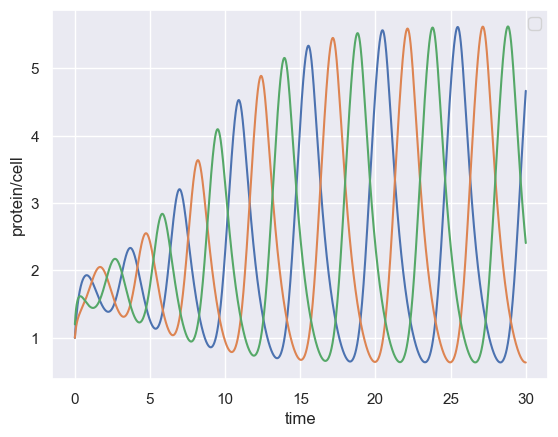

In [10]:
# Graficar tiempo vs masa
plt.plot(t_array, p_array)

# Agregar leyenda
plt.legend()

# Anotar ejes
plt.xlabel("time")
plt.ylabel("protein/cell")